In [143]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.

In [144]:
financials = pd.read_csv("/Users/sa12/Documents/Repositories/FinancialFraudDetection/FraudData/financials.csv", index_col=0)

In [145]:
tiny_financials = financials.tail(50000)
financials.tail()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,,,,,,,,,,
743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [146]:
financials.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6362620 entries, 1 to 743
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   nameOrig        object 
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   nameDest        object 
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   isFraud         int64  
 9   isFlaggedFraud  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 534.0+ MB


In [147]:
financials.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [148]:
financials.isna().count()
#what to do with nas

type              6362620
amount            6362620
nameOrig          6362620
oldbalanceOrg     6362620
newbalanceOrig    6362620
nameDest          6362620
oldbalanceDest    6362620
newbalanceDest    6362620
isFraud           6362620
isFlaggedFraud    6362620
dtype: int64

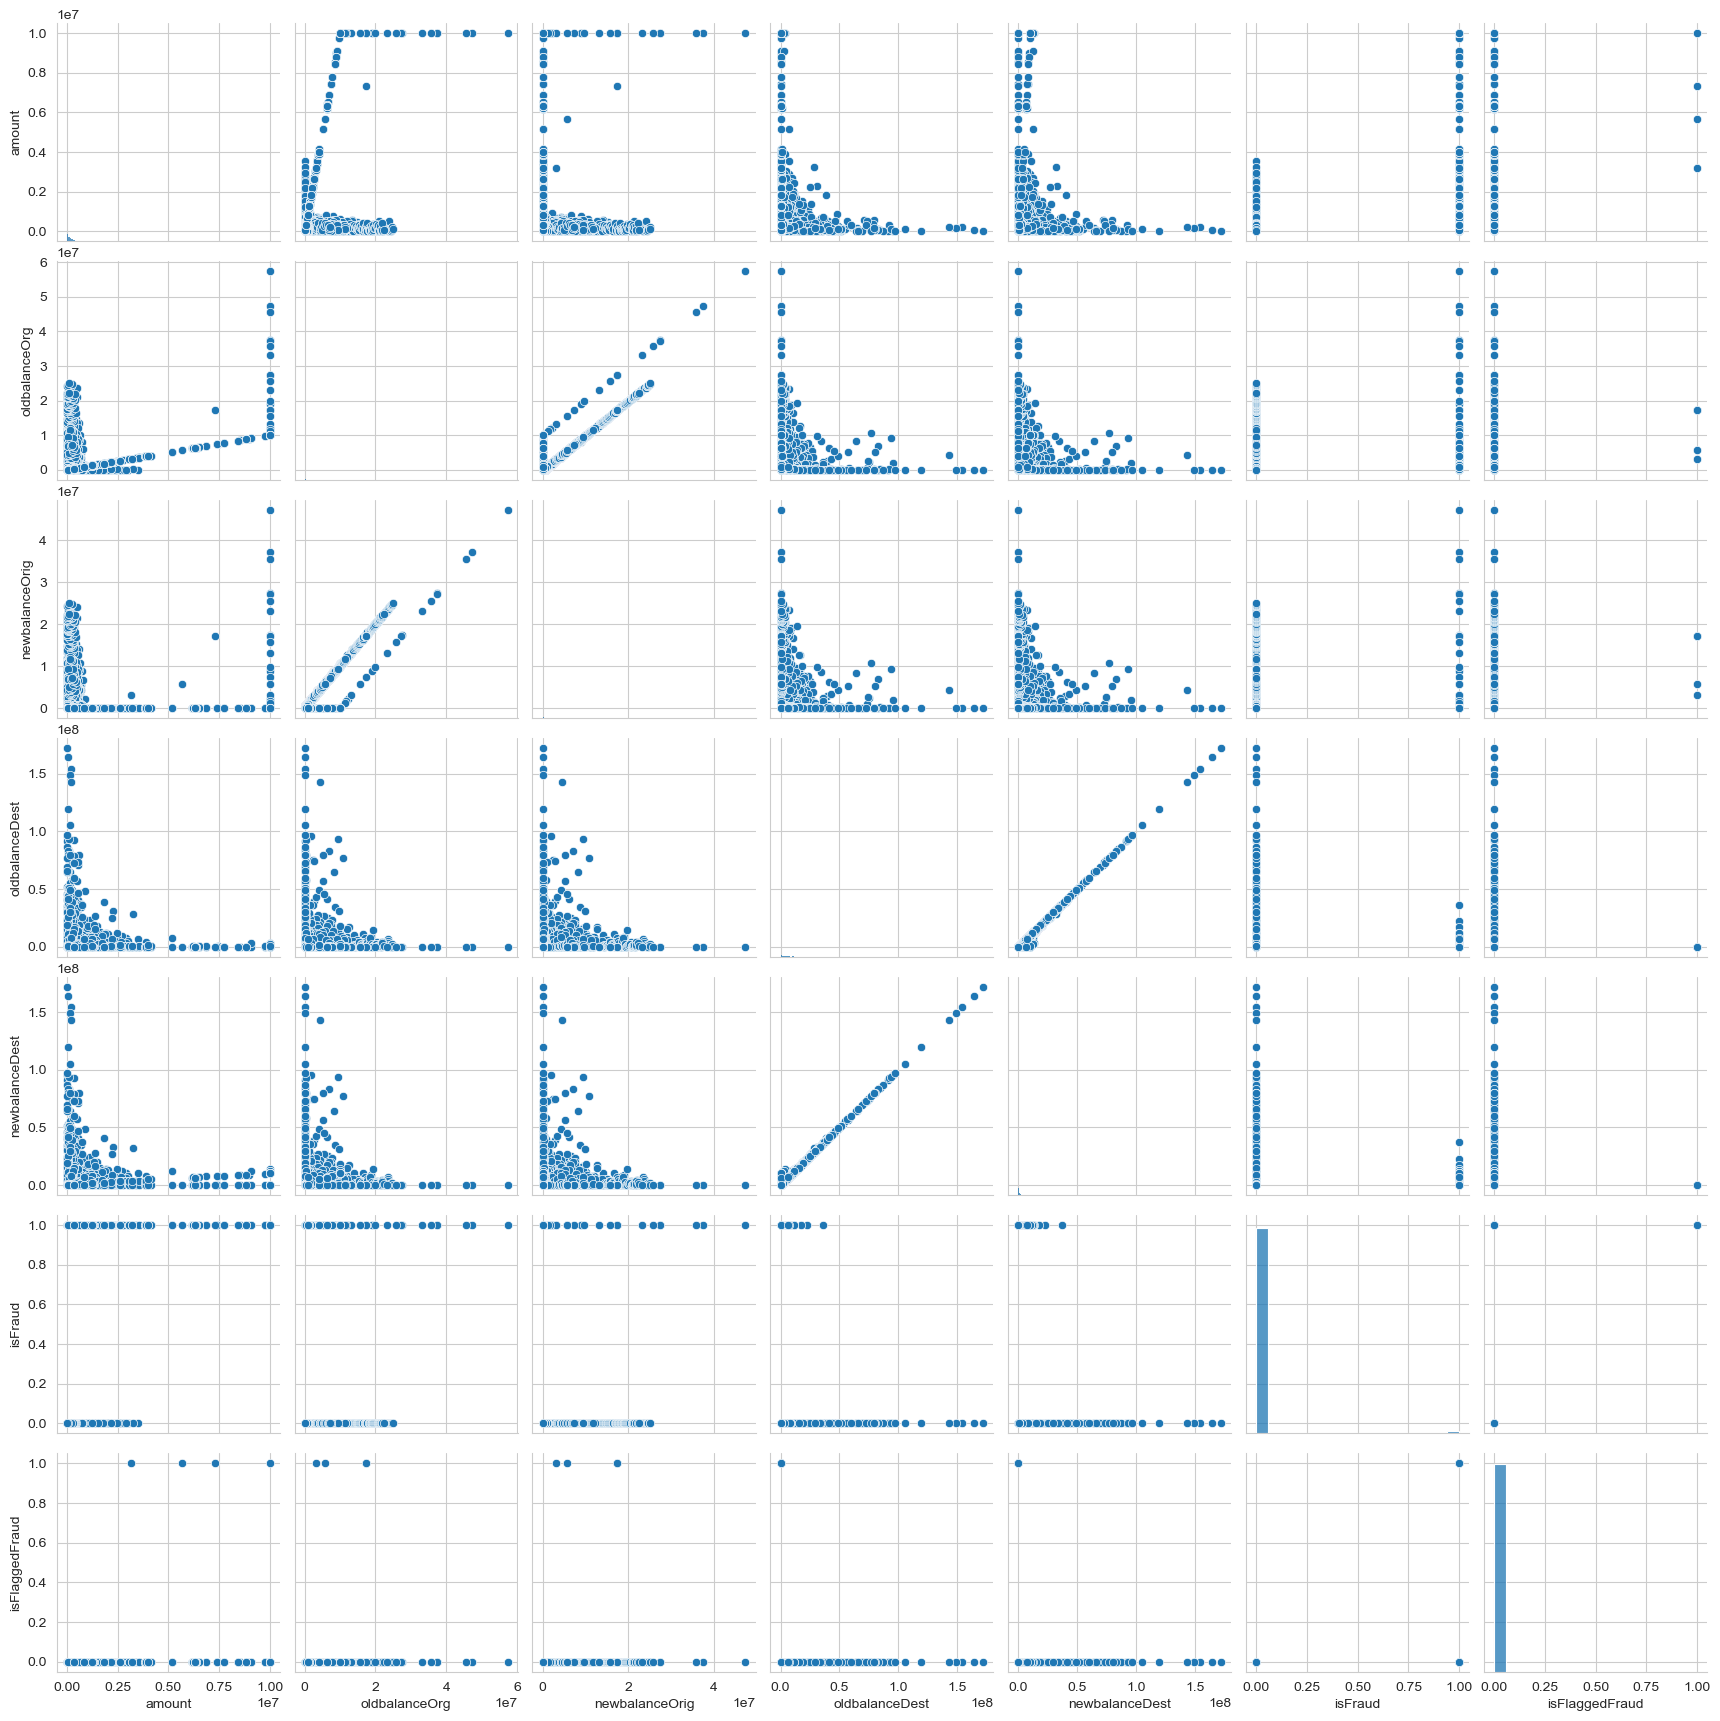

In [149]:
sns.pairplot(tiny_financials)

In [150]:
corr_tiny_financials = tiny_financials.select_dtypes(include=['int64','float'])
corr_tiny_financials.corr()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
amount,1.000000,0.243594,0.083667,0.052927,0.113806,0.428489,0.134673
oldbalanceOrg,0.243594,1.000000,0.980923,0.060908,0.054326,0.095651,0.045566
newbalanceOrig,0.083667,0.980923,1.000000,0.066782,0.049478,-0.001017,0.046195
oldbalanceDest,0.052927,0.060908,0.066782,1.000000,0.996005,-0.015332,-0.002545
newbalanceDest,0.113806,0.054326,0.049478,0.996005,1.000000,0.007621,-0.002704
isFraud,0.428489,0.095651,-0.001017,-0.015332,0.007621,1.000000,0.077456
isFlaggedFraud,0.134673,0.045566,0.046195,-0.002545,-0.002704,0.077456,1.000000


<Axes: >

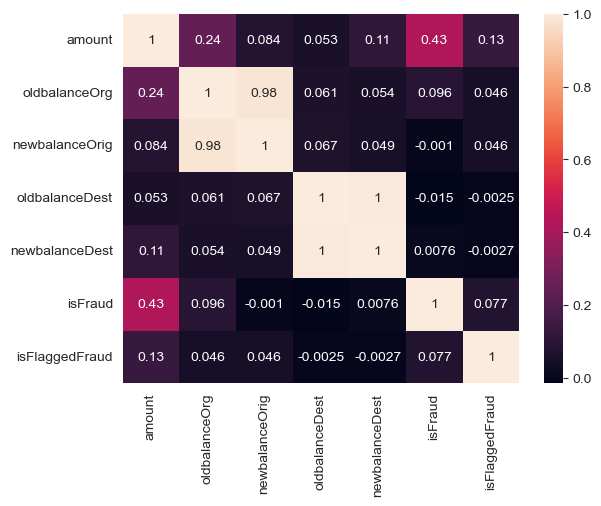

In [151]:
sns.heatmap(corr_tiny_financials.corr(), annot=True)

Looking at the whole dataset, there seems to be a lot of correlation between values. What this means is I need to find some way to seperate this data in order to find any meaningful conclusions. There is already a built in way to classfy data: fraudulent transactions have a 1 in the fraud column, while non-fraud has a 0. I will use boolean indexing to create 2 dataframes: fraud and non fraud. 

In [152]:
fraud = financials[financials['isFraud'] == 1]
not_fraud = financials[financials['isFraud'] == 0]
not_fraud_short = not_fraud.head(100000)
fraud.count()
#first 50,000 rows only had 100 cases of fraud.
#last 50,000 rows has 658 cases of fraud.

type              8213
amount            8213
nameOrig          8213
oldbalanceOrg     8213
newbalanceOrig    8213
nameDest          8213
oldbalanceDest    8213
newbalanceDest    8213
isFraud           8213
isFlaggedFraud    8213
dtype: int64

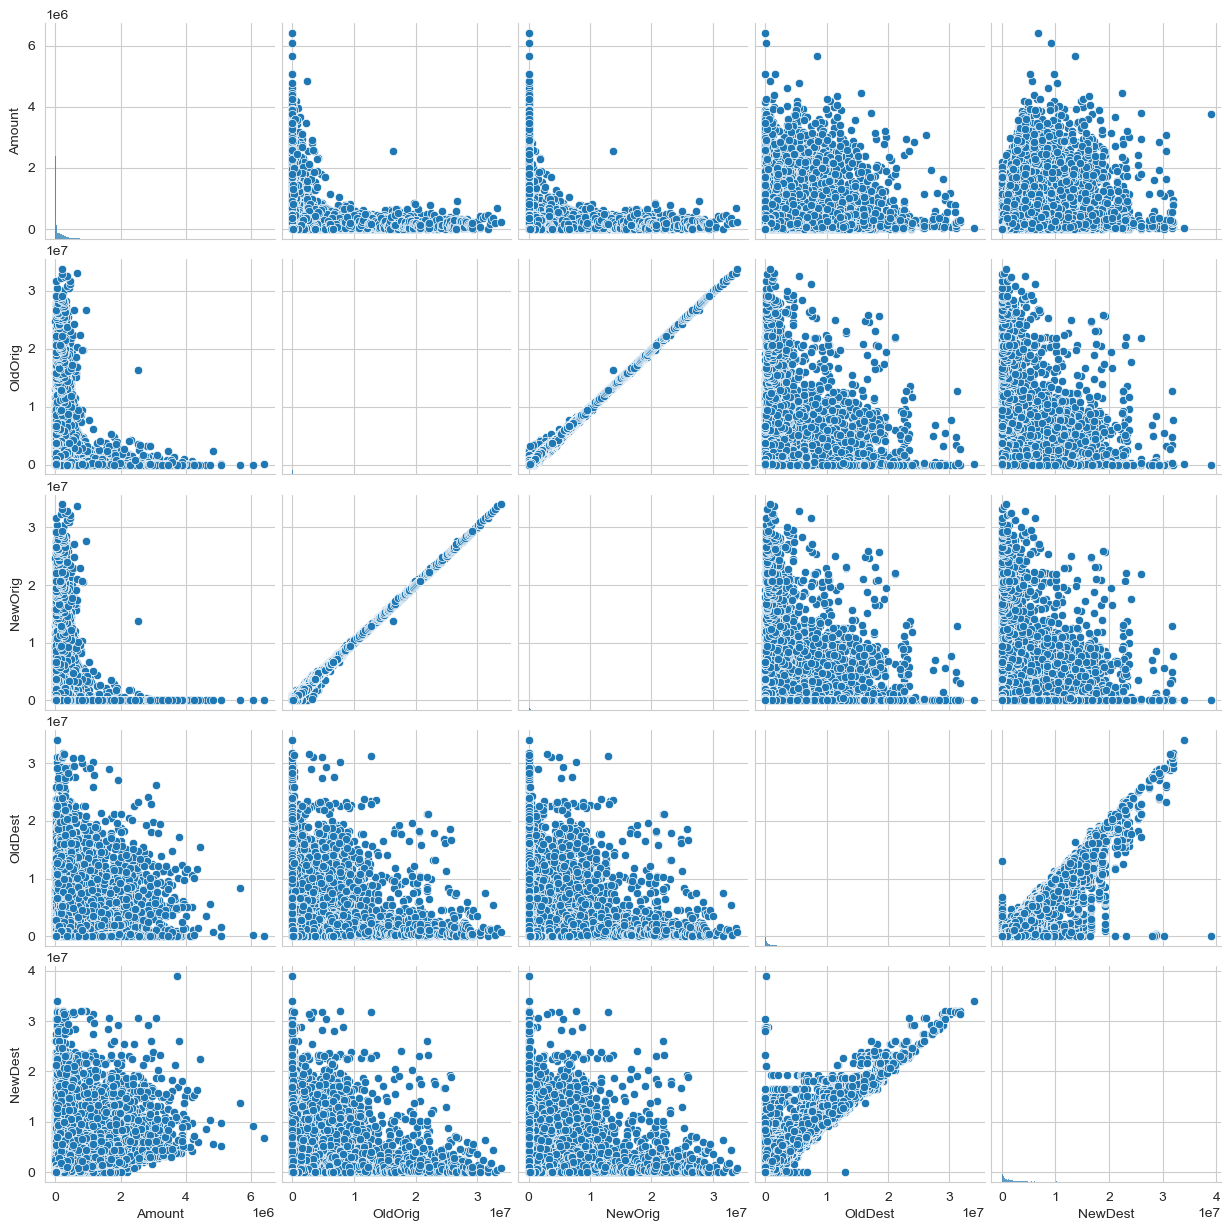

In [153]:
not_fraud2 = not_fraud_short.drop(columns=['nameOrig', 'nameDest', 'isFraud','isFlaggedFraud'])
not_fraud2.rename(columns={'amount':'Amount','oldbalanceOrg':'OldOrig','newbalanceOrig':'NewOrig','oldbalanceDest':'OldDest','newbalanceDest':'NewDest'}, inplace=True)
sns.pairplot(not_fraud2)

This is a visualization of the normal distrubution of the finacial transaction data. All proven cases of fraud have been removed leaving us with our base assumptiuon of how values should be distibuted.

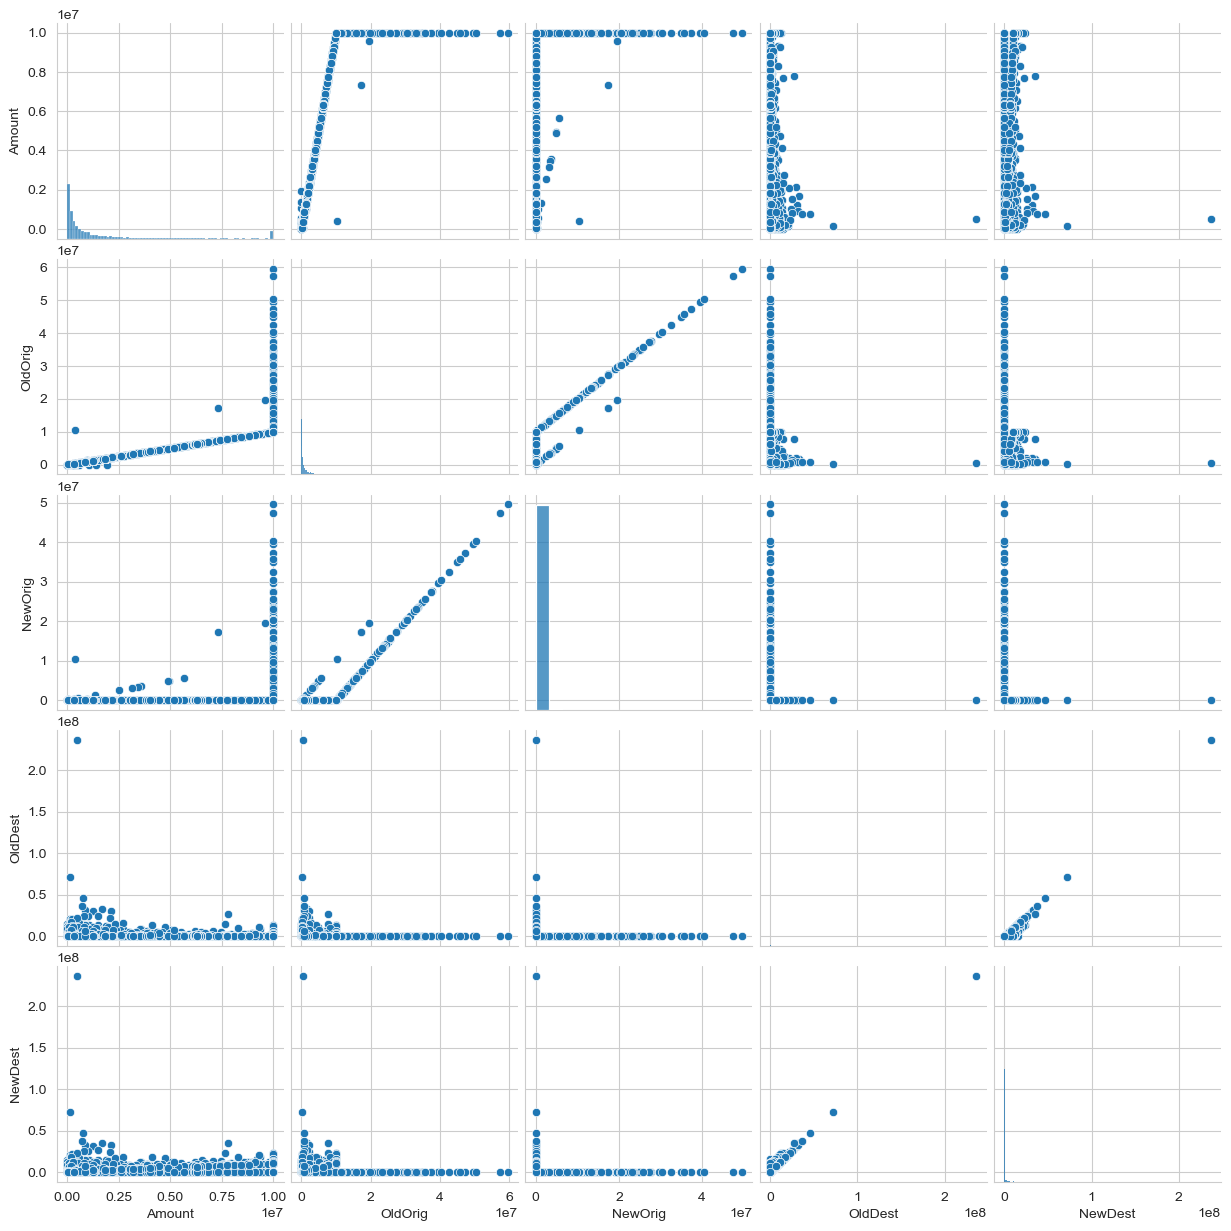

In [154]:
fraud2 = fraud.drop(columns=['nameOrig', 'nameDest', 'isFraud','isFlaggedFraud','type'])
fraud2.rename(columns={'amount':'Amount','oldbalanceOrg':'OldOrig','newbalanceOrig':'NewOrig','oldbalanceDest':'OldDest','newbalanceDest':'NewDest'}, inplace=True)
sns.pairplot(fraud2)

This is the distribution of data in transactions found to be fraudulent. There is a noticable difference in how the data falls. Specifically there is much less observed variance in the columns with data about the amounts in the origins and destinations.
##### Amount

<Axes: >

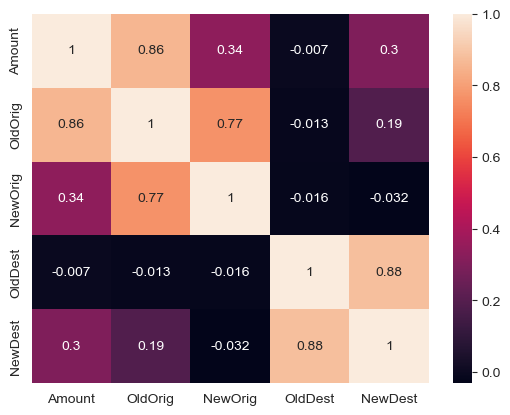

In [155]:
sns.heatmap(fraud2.corr(), annot=True)

The OldDest column seems to have the highest negative coorelations across the board.

In [164]:
fraud2['OldDest'].value_counts()
#shows that many fraud cases have an acount with $0
fraud2_no0 = fraud2[fraud2['OldDest'] != 0]

Amount       OldOrig      NewOrig  OldDest      NewDest    
0.00         0.00         0.0      27938.72     27938.72       1
967153.50    967153.50    0.0      183670.20    1150823.70     1
929106.32    929106.32    0.0      559809.62    1488915.94     1
929787.24    929787.24    0.0      8148960.26   9078747.50     1
931684.75    931684.75    0.0      3608144.66   4539829.41     1
                                                              ..
191834.14    191834.14    0.0      105924.30    297758.43      1
192765.49    192765.49    0.0      3252407.57   3445173.06     1
193545.61    193545.61    0.0      183785.02    377330.62      1
193706.98    193706.98    0.0      18047571.21  19642021.17    1
10000000.00  10000000.00  0.0      13009399.24  23009399.24    1
Name: count, Length: 2862, dtype: int64

<Axes: xlabel='Amount', ylabel='OldDest'>

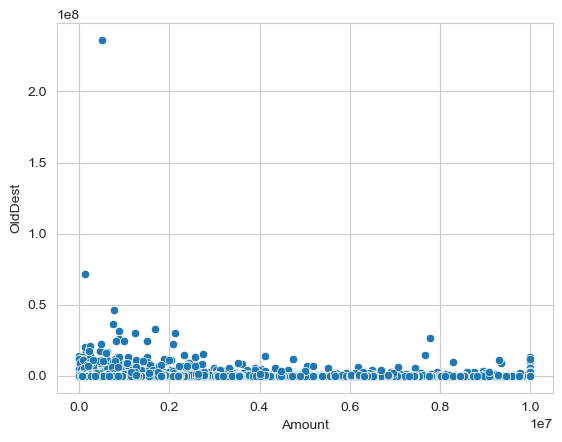

In [159]:
sns.scatterplot(x='Amount', y='OldDest', data=fraud2)

<Axes: xlabel='amount', ylabel='newbalanceDest'>

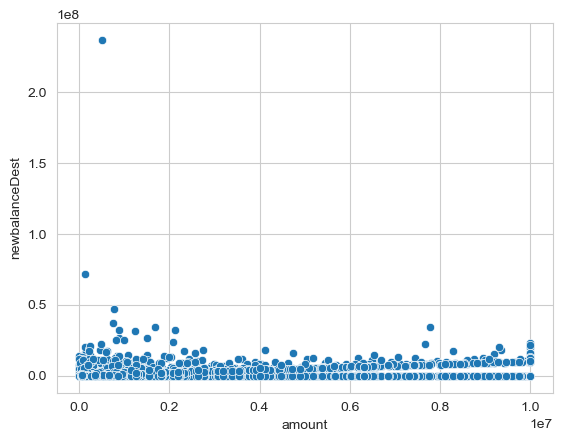

In [ ]:
sns.scatterplot(x='amount', y='NewDest', data=fraud2)

In [ ]:
fraud2.head()

,amount,OldOrig,NewOrig,OldDest,NewDest
step,,,,,
1,181.0,181.0,0.0,0.0,0.0
1,181.0,181.0,0.0,21182.0,0.0
1,2806.0,2806.0,0.0,0.0,0.0
1,2806.0,2806.0,0.0,26202.0,0.0
1,20128.0,20128.0,0.0,0.0,0.0


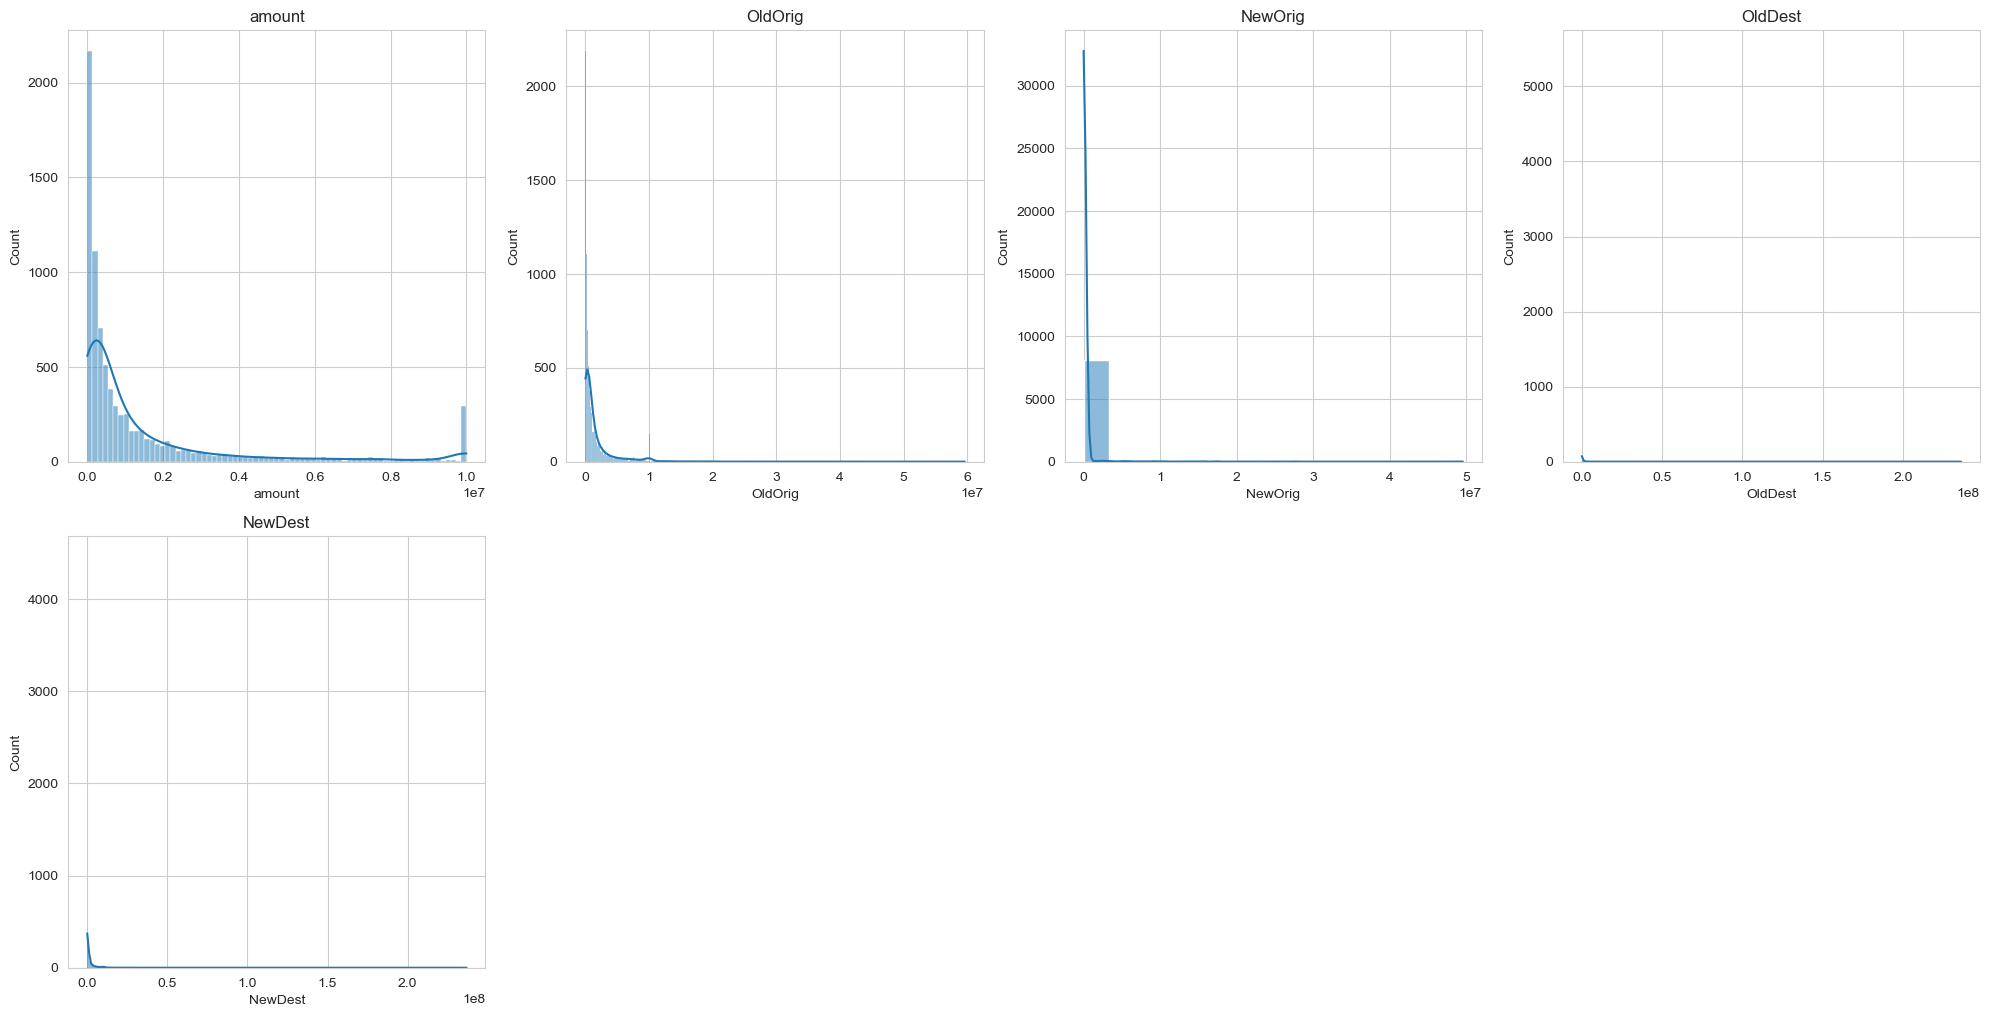

In [ ]:
sns.set_style(style="whitegrid")

# Selecting columns for plots
float_cols = Financials.select_dtypes(include=['float']).columns
# Plotting distributions of numerical features

plt.figure(figsize=(20, 20))
for i, col in enumerate(fraud2):
    plt.subplot(5, 4, i + 1)
    sns.histplot(fraud2[col], kde=True)
    plt.title(col)
    plt.tight_layout()